<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


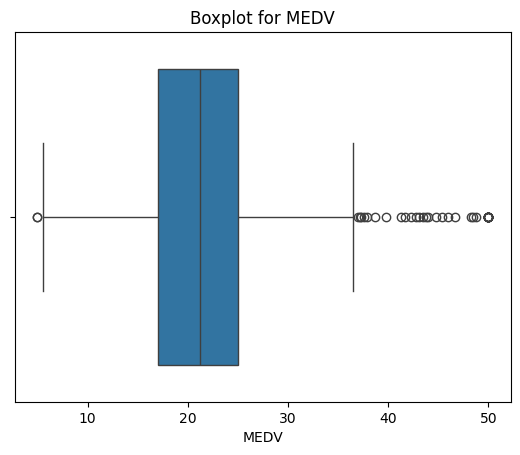

Outliers after third quartile.


In [34]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x=boston_df.MEDV)
pyplot.title("Boxplot for MEDV")
pyplot.show()

print("Outliers after third quartile.")

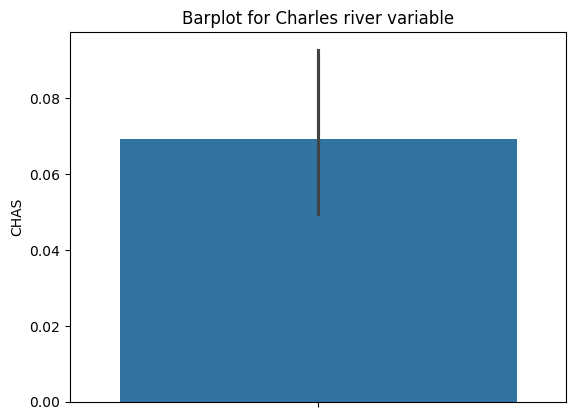

In [14]:
#Provide a  bar plot for the Charles river variable
sns.barplot(y=boston_df.CHAS)
pyplot.title("Barplot for Charles river variable")
pyplot.show()

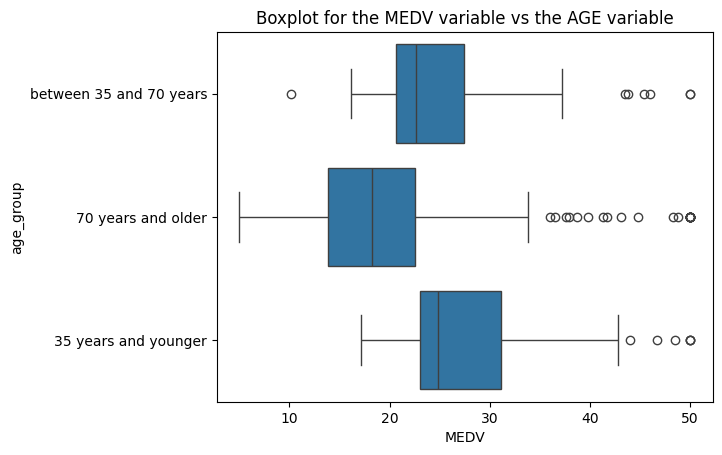

35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses


In [33]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

print("35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses")

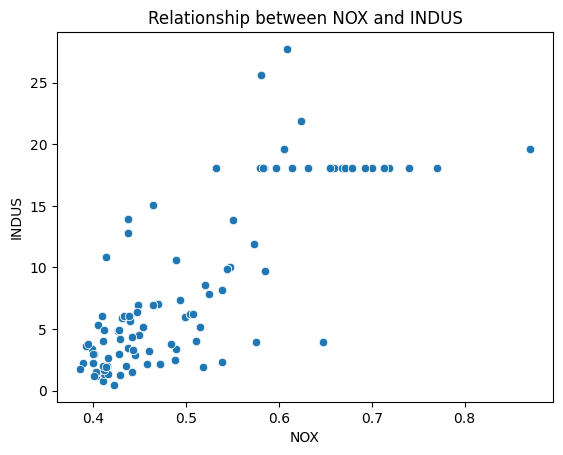

The points show a positive trend, it suggests that higher industrial land use is associated with higher nitric oxides concentration.


In [32]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
pyplot.title("Relationship between NOX and INDUS")
pyplot.show()

print("The points show a positive trend, it suggests that higher industrial land use is associated with higher nitric oxides concentration.")

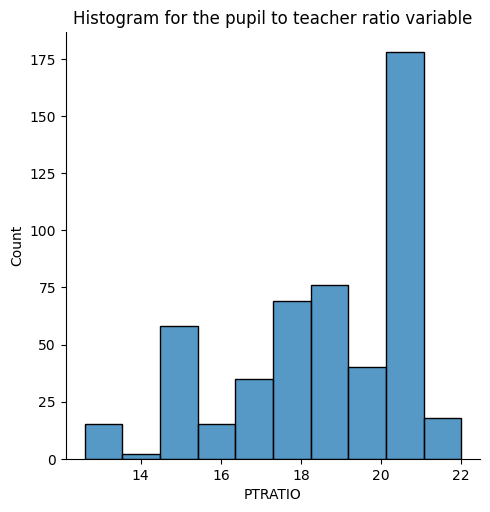

In [19]:
#Create a histogram for the pupil to teacher ratio variable
sns.displot(boston_df.PTRATIO,bins=10, kde=False)
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()

In [27]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy.stats import ttest_ind

charles_column = "CHAS"  
medv_column = "MEDV"  


group1 = boston_df[boston_df[charles_column] == 1][medv_column]  
group2 = boston_df[boston_df[charles_column] == 0][medv_column]  


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  


print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Conclusion:Reject the null hypothesis: There is a significant difference in median home values.")
else:
    print("Conclusion: Fail to reject the null hypothesis: No significant difference in median home values.")


T-statistic: 3.1133, P-value: 0.0036
Conclusion:Reject the null hypothesis: There is a significant difference in median home values.


In [28]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#null hypothesis: There is a significant difference in median home values across age groups.
#No significant difference in median home values across age groups.
model = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(model)
print(table)

print("Conclusion:Reject the Null Hyptohesis!")

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN
Conclusion:Reject the Null Hyptohesis!


In [30]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
print("Null hypothesis: There is a significant correlation between NOX and INDUS")
print("No significant correlation between NOX and INDUS.")

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Conclusion: Reject the null hypothesis!")


Null hypothesis: There is a significant correlation between NOX and INDUS
No significant correlation between NOX and INDUS.
Conclusion: Reject the null hypothesis!


In [31]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
print("Null hypothesis: Distance to employment centers significantly impacts median home value.")
print("Distance to employment centers does not significantly impact median home value")

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

print("Standard Errors assume that the covariance matrix of the errors is correctly specified.")
print("Conclusion:Reject the null hypothesis ")

Null hypothesis: Distance to employment centers significantly impacts median home value.
Distance to employment centers does not significantly impact median home value
Standard Errors assume that the covariance matrix of the errors is correctly specified.
Conclusion:Reject the null hypothesis 
